<a href="https://colab.research.google.com/github/AbbasFAlhokri/AbbasFAlhokri/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [53]:
# Importing the required data 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sn
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from numpy import array
from numpy import argmax
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Load the data 
Loading the data 


In [54]:
# read the data
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# Data Preparation

In [55]:
# we need to learn about the data 
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [56]:
# let's check missing data.
df.isna().sum()


holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [57]:
# let's check the unique value categorical attributes for the sake of one hot incoding.
#for the following colunm: holiday , weather_main , weather_description.
print("holiday unique values:", df.holiday.unique())
print("\nweather unique values:", df.weather_main.unique())
print("\nweather description unique values:", df.weather_description.unique())

holiday unique values: ['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']

weather unique values: ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']

weather description unique values: ['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light 

#Data Understanding 

In this part we are going to visulize each feature and see how many different unique values

In [58]:
# knowing that we have differet unique values for holiday, let's print thier counts
df["holiday"].value_counts()


None                         48143
Labor Day                        7
Thanksgiving Day                 6
New Years Day                    6
Christmas Day                    6
Martin Luther King Jr Day        6
State Fair                       5
Independence Day                 5
Washingtons Birthday             5
Columbus Day                     5
Memorial Day                     5
Veterans Day                     5
Name: holiday, dtype: int64

We notice working days are dominating over holiday in all 7 years. 

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


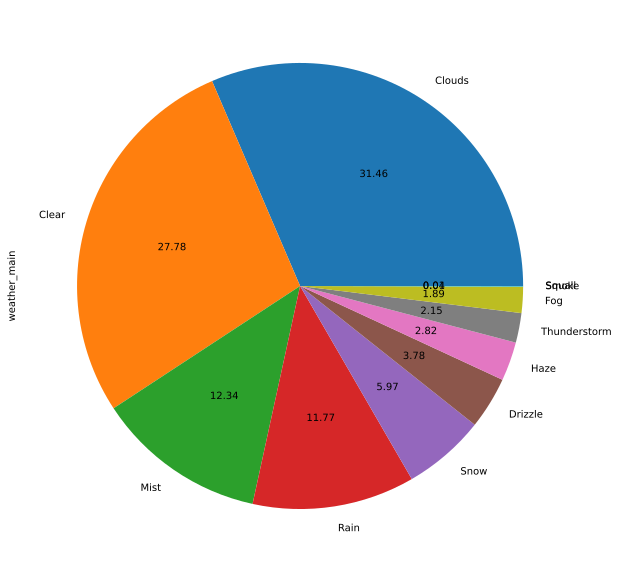

In [59]:
# knowing that we have differet unique values for weather main, let's print thier counts
print(df["weather_main"].value_counts())
df["weather_main"].value_counts().plot.pie(figsize=(10,20), autopct="%.2f")

We notice here most of the time the weather either clouds , clear or mist or rain respectively. whereas other weather main does not happened frequantly.  

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

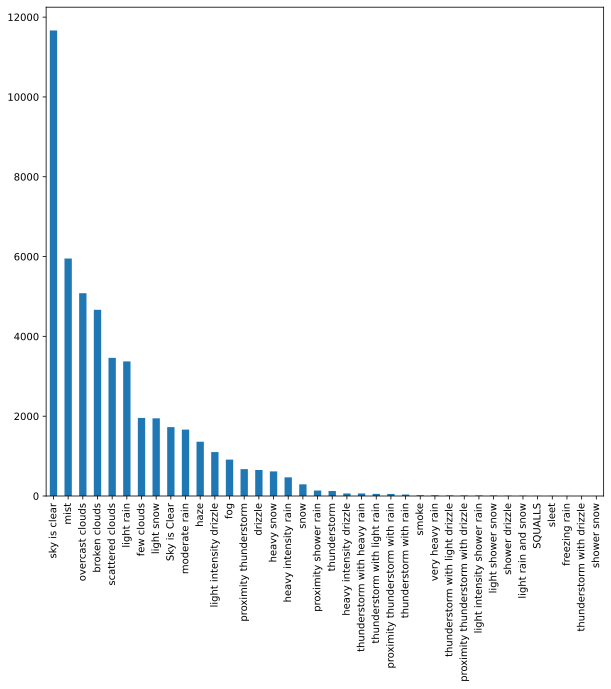

In [60]:
# knowing that we have differet unique values for weather main, let's print thier counts
plt.figure(figsize=[10,9])
print(df["weather_description"].value_counts())
df["weather_description"].value_counts().plot(kind='bar')

From the above figure,  we can see that sky is clear in most time. 

In [61]:
# To understand the temprature value we need to convert it from kelvin to celsius
df['temp'] = df['temp'] - 273.15

# Detecting outliers

Text(0.5, 1.0, 'traffic volume')

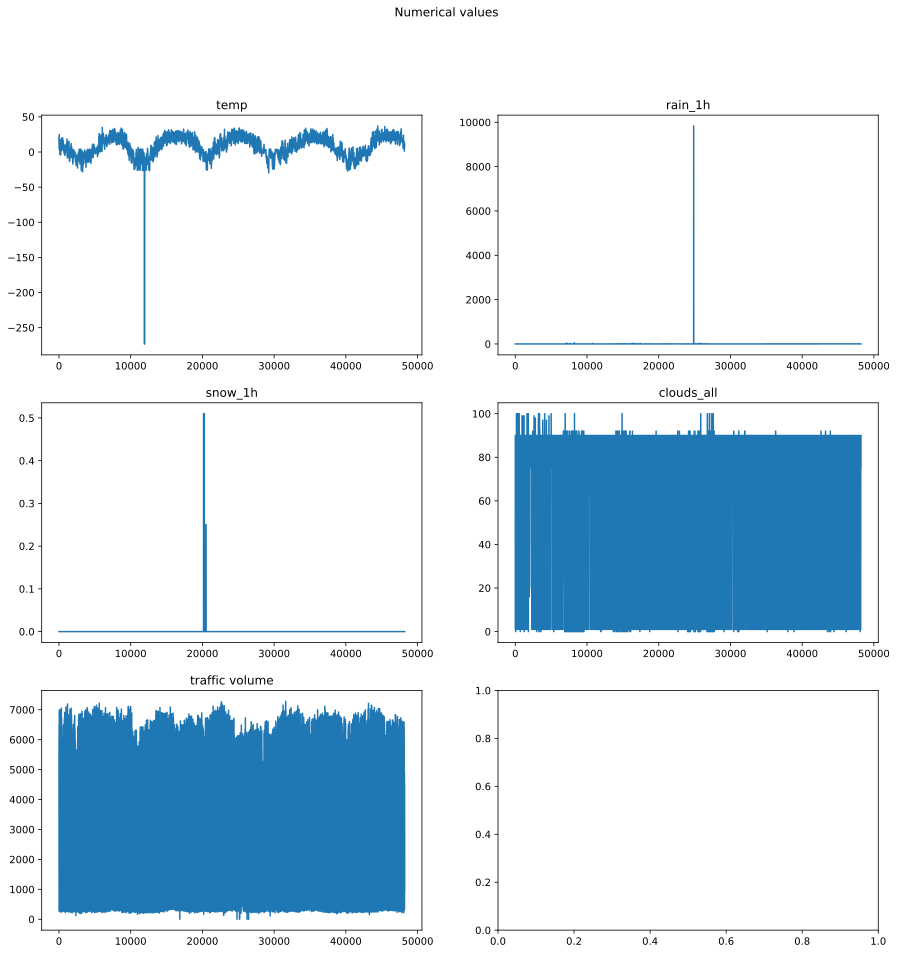

In [62]:
# let's see if there are any outliers for the other features
fig, ax = plt.subplots(3, 2,figsize=(15,15))
fig.suptitle('Numerical values')
ax[0, 0].plot(df.temp)
ax[0, 0].set_title('temp')
ax[0, 1].plot(df.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(df.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(df.clouds_all)
ax[1, 1].set_title('clouds_all')
ax[2,0].plot(df["traffic_volume"]);
ax[2, 0].set_title('traffic volume')

we can notice from the above figuers there are outliers in temp and rain_1h features



In [63]:
# As we can see from the above figures , most tempratures are between 50 , -50.
# But we see there's an outlier which has -265 c. 
# let's drop the outliers of temp less than - 50 c.
df.drop(df[df.temp < -50].index, inplace=True)
# we can notive from the above figures, there are an outliers in rain_1h
df.drop(df[df.rain_1h > 1000].index, inplace=True)

Text(0.5, 1.0, 'traffic volume')

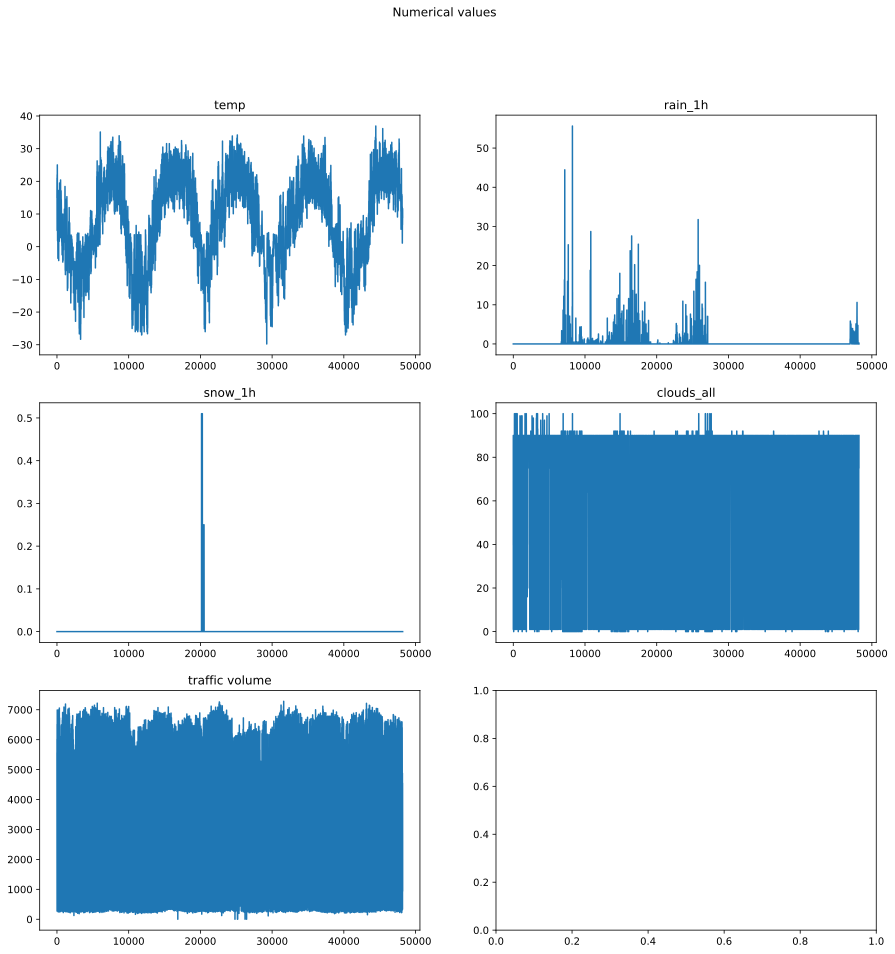

In [64]:
# let's see the data after deleting the outliers 
fig, ax = plt.subplots(3, 2,figsize=(15,15))
fig.suptitle('Numerical values')
ax[0, 0].plot(df.temp)
ax[0, 0].set_title('temp')
ax[0, 1].plot(df.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(df.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(df.clouds_all)
ax[1, 1].set_title('clouds_all')
ax[2,0].plot(df["traffic_volume"]);
ax[2, 0].set_title('traffic volume')

we notice there are some outlires in snow_1h, let's examin these values.

In [65]:
df.snow_1h.value_counts()

0.00    48130
0.05       14
0.06       12
0.10        6
0.13        6
0.51        6
0.25        6
0.32        5
0.17        3
0.08        2
0.44        2
0.21        1
Name: snow_1h, dtype: int64

As it can be seen from the above table most of the time there is no snow. and it is rarly snowed however for the sake of taking this as a feature we will consider these observation.

# one hot encoding

In [66]:
# Since we have different categries of weather_main, we can use hot encoding to describe each weather_main. 
# one hot encode weather description column
data = df["weather_main"]
values = array(data)
x = data.unique()
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# Add the encoded features into the dataframes
df = pd.concat([df, pd.DataFrame(onehot_encoded)], axis=1)
# Rename the encoded with its orginal name instead of dealing with numbers as names. 
for i in range (len(x)):
    inverted = label_encoder.inverse_transform([i])[0]
    df.rename(columns={i: inverted},inplace=True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
0,None,15.13,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,None,16.21,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,None,16.43,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,None,16.98,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,None,17.99,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Conver data_time into hour , day , month and year 

In [67]:
# First we need to make sure that each hour has one observation
df['date_time'].value_counts()

2013-05-19 10:00:00    6
2013-04-18 22:00:00    6
2012-11-11 09:00:00    5
2013-12-16 10:00:00    5
2018-04-14 09:00:00    5
                      ..
2017-12-04 03:00:00    1
2013-08-05 04:00:00    1
2014-07-21 18:00:00    1
2013-07-22 04:00:00    1
2014-01-07 01:00:00    1
Name: date_time, Length: 40564, dtype: int64

In [68]:
# since we have more than one observation in one hour , we should aggregate rows with same date-time
df_new = df.groupby('date_time',as_index=False).agg('max')

In [69]:
# Let's now break date_time down into hour , day of week , month , year 
df_new['date_time'] = pd.to_datetime(df_new['date_time'])
# create column with hours from date_time
df_new ['hour'] = df_new['date_time'].dt.hour
# create column with day of the week from date_time
df_new['day_of_week'] = df_new['date_time'].dt.dayofweek
# create column with month from date_time
df_new['month'] = df_new['date_time'].dt.month
# create column with month from date_time
df_new['year'] = df_new['date_time'].dt.year


Visulzation of Date 

Text(0.5, 1.0, 'year')

<Figure size 432x288 with 0 Axes>

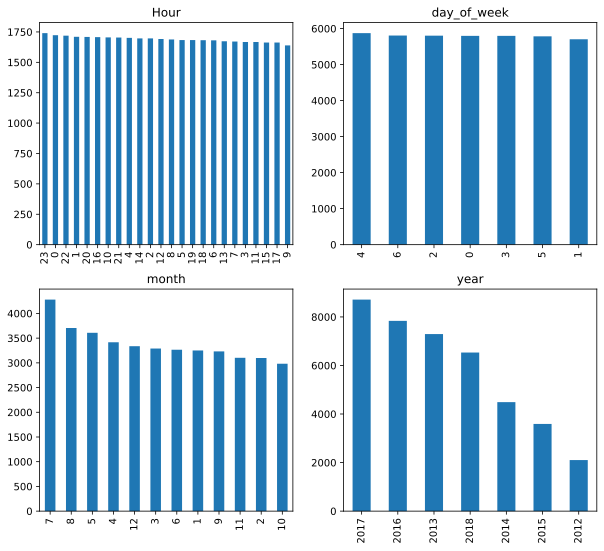

In [70]:
# we want to visulaize the data based on the hour and days and months , year.
# visulizing the data after removing the outliers
plt.suptitle('Date visulization',fontsize = 20)
plt.figure(figsize=[10,9])
plt.subplot(2,2,1)            
df_new['hour'].value_counts().plot(kind='bar')
plt.title('Hour')
plt.subplot(2,2,2)            
df_new['day_of_week'].value_counts().plot(kind='bar')
plt.title('day_of_week')
plt.subplot(2,2,3)            
df_new['month'].value_counts().plot(kind='bar')
plt.title('month')
plt.subplot(2,2,4)            
df_new['year'].value_counts().plot(kind='bar')
plt.title('year')

Text(0, 0.5, 'traffic volume')

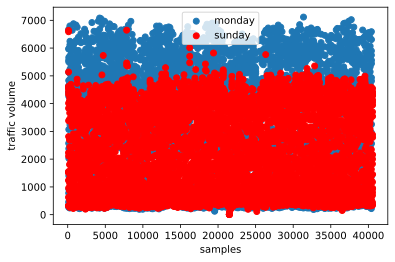

In [71]:
#let's compare between the sunday and monday  
plt.scatter(df_new[df_new.day_of_week==0].index, df_new[df_new.day_of_week==0].traffic_volume, label='monday')
plt.scatter(df_new[df_new.day_of_week==6].index, df_new[df_new.day_of_week==6].traffic_volume, color='r', label='sunday')
plt.legend()
plt.xlabel('samples')
plt.ylabel('traffic volume')

We notice on Monday there is more trafice than sunday 

# Creating a day off colunm

this can be implemnted by converting holiday colunm into booleen 
if there is none we assign holiday to 0 else we assign holiday to 1.
after that we create  off_day colunm by making an OR function between days where it will be true if it is weedned day else it will be zero.
also, if hoilday has value of one, off_day should be one.

The Logical function:

off_day_colunm = Day of week + Hoilday



In [72]:
# Change holiday column to be a boolean: True if holiday else False , instead of working with different kind of holiday.
df_new["holiday"] = np.where(df_new.holiday=="None", 0, 1)
df_new["holiday"] = df_new["holiday"].astype('int8')

In [73]:
# let's see the traffic during the holidays in compare to non-hoildays.
# fist make weekends as an off day
df_new['day_off'] = np.where(np.logical_or(df_new.day_of_week==5, df_new.day_of_week==6), 1, 0)
# second make holidays as an off day
df_new['day_off'] = np.where(df_new.holiday==1, 1, df_new['day_off'])

# Delete the unrequired colunms.

In [74]:
df_new

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm,hour,day_of_week,month,year,day_off
0,2012-10-02 09:00:00,0,15.13,0.0,0.0,40.0,Clouds,scattered clouds,5545.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1,10,2012,0
1,2012-10-02 10:00:00,0,16.21,0.0,0.0,75.0,Clouds,broken clouds,4516.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1,10,2012,0
2,2012-10-02 11:00:00,0,16.43,0.0,0.0,90.0,Clouds,overcast clouds,4767.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,10,2012,0
3,2012-10-02 12:00:00,0,16.98,0.0,0.0,90.0,Clouds,overcast clouds,5026.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1,10,2012,0
4,2012-10-02 13:00:00,0,17.99,0.0,0.0,75.0,Clouds,broken clouds,4918.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,10,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40559,2018-09-30 19:00:00,0,10.30,0.0,0.0,75.0,Clouds,broken clouds,3543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,6,9,2018,1
40560,2018-09-30 20:00:00,0,9.61,0.0,0.0,90.0,Clouds,overcast clouds,2781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,6,9,2018,1
40561,2018-09-30 21:00:00,0,9.58,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6,9,2018,1
40562,2018-09-30 22:00:00,0,8.94,0.0,0.0,90.0,Clouds,overcast clouds,1450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,6,9,2018,1


In [75]:
# Since we have extract the needed observation from these colunms, hence we can drop it.
df_new.drop(['date_time'],axis=1,inplace=True)
df_new.drop(['holiday'],axis=1,inplace=True)
df_new.drop(['weather_main'],axis=1,inplace=True)	

#Corrolation  metrix

To understand the relation between traffic volunm and other features 

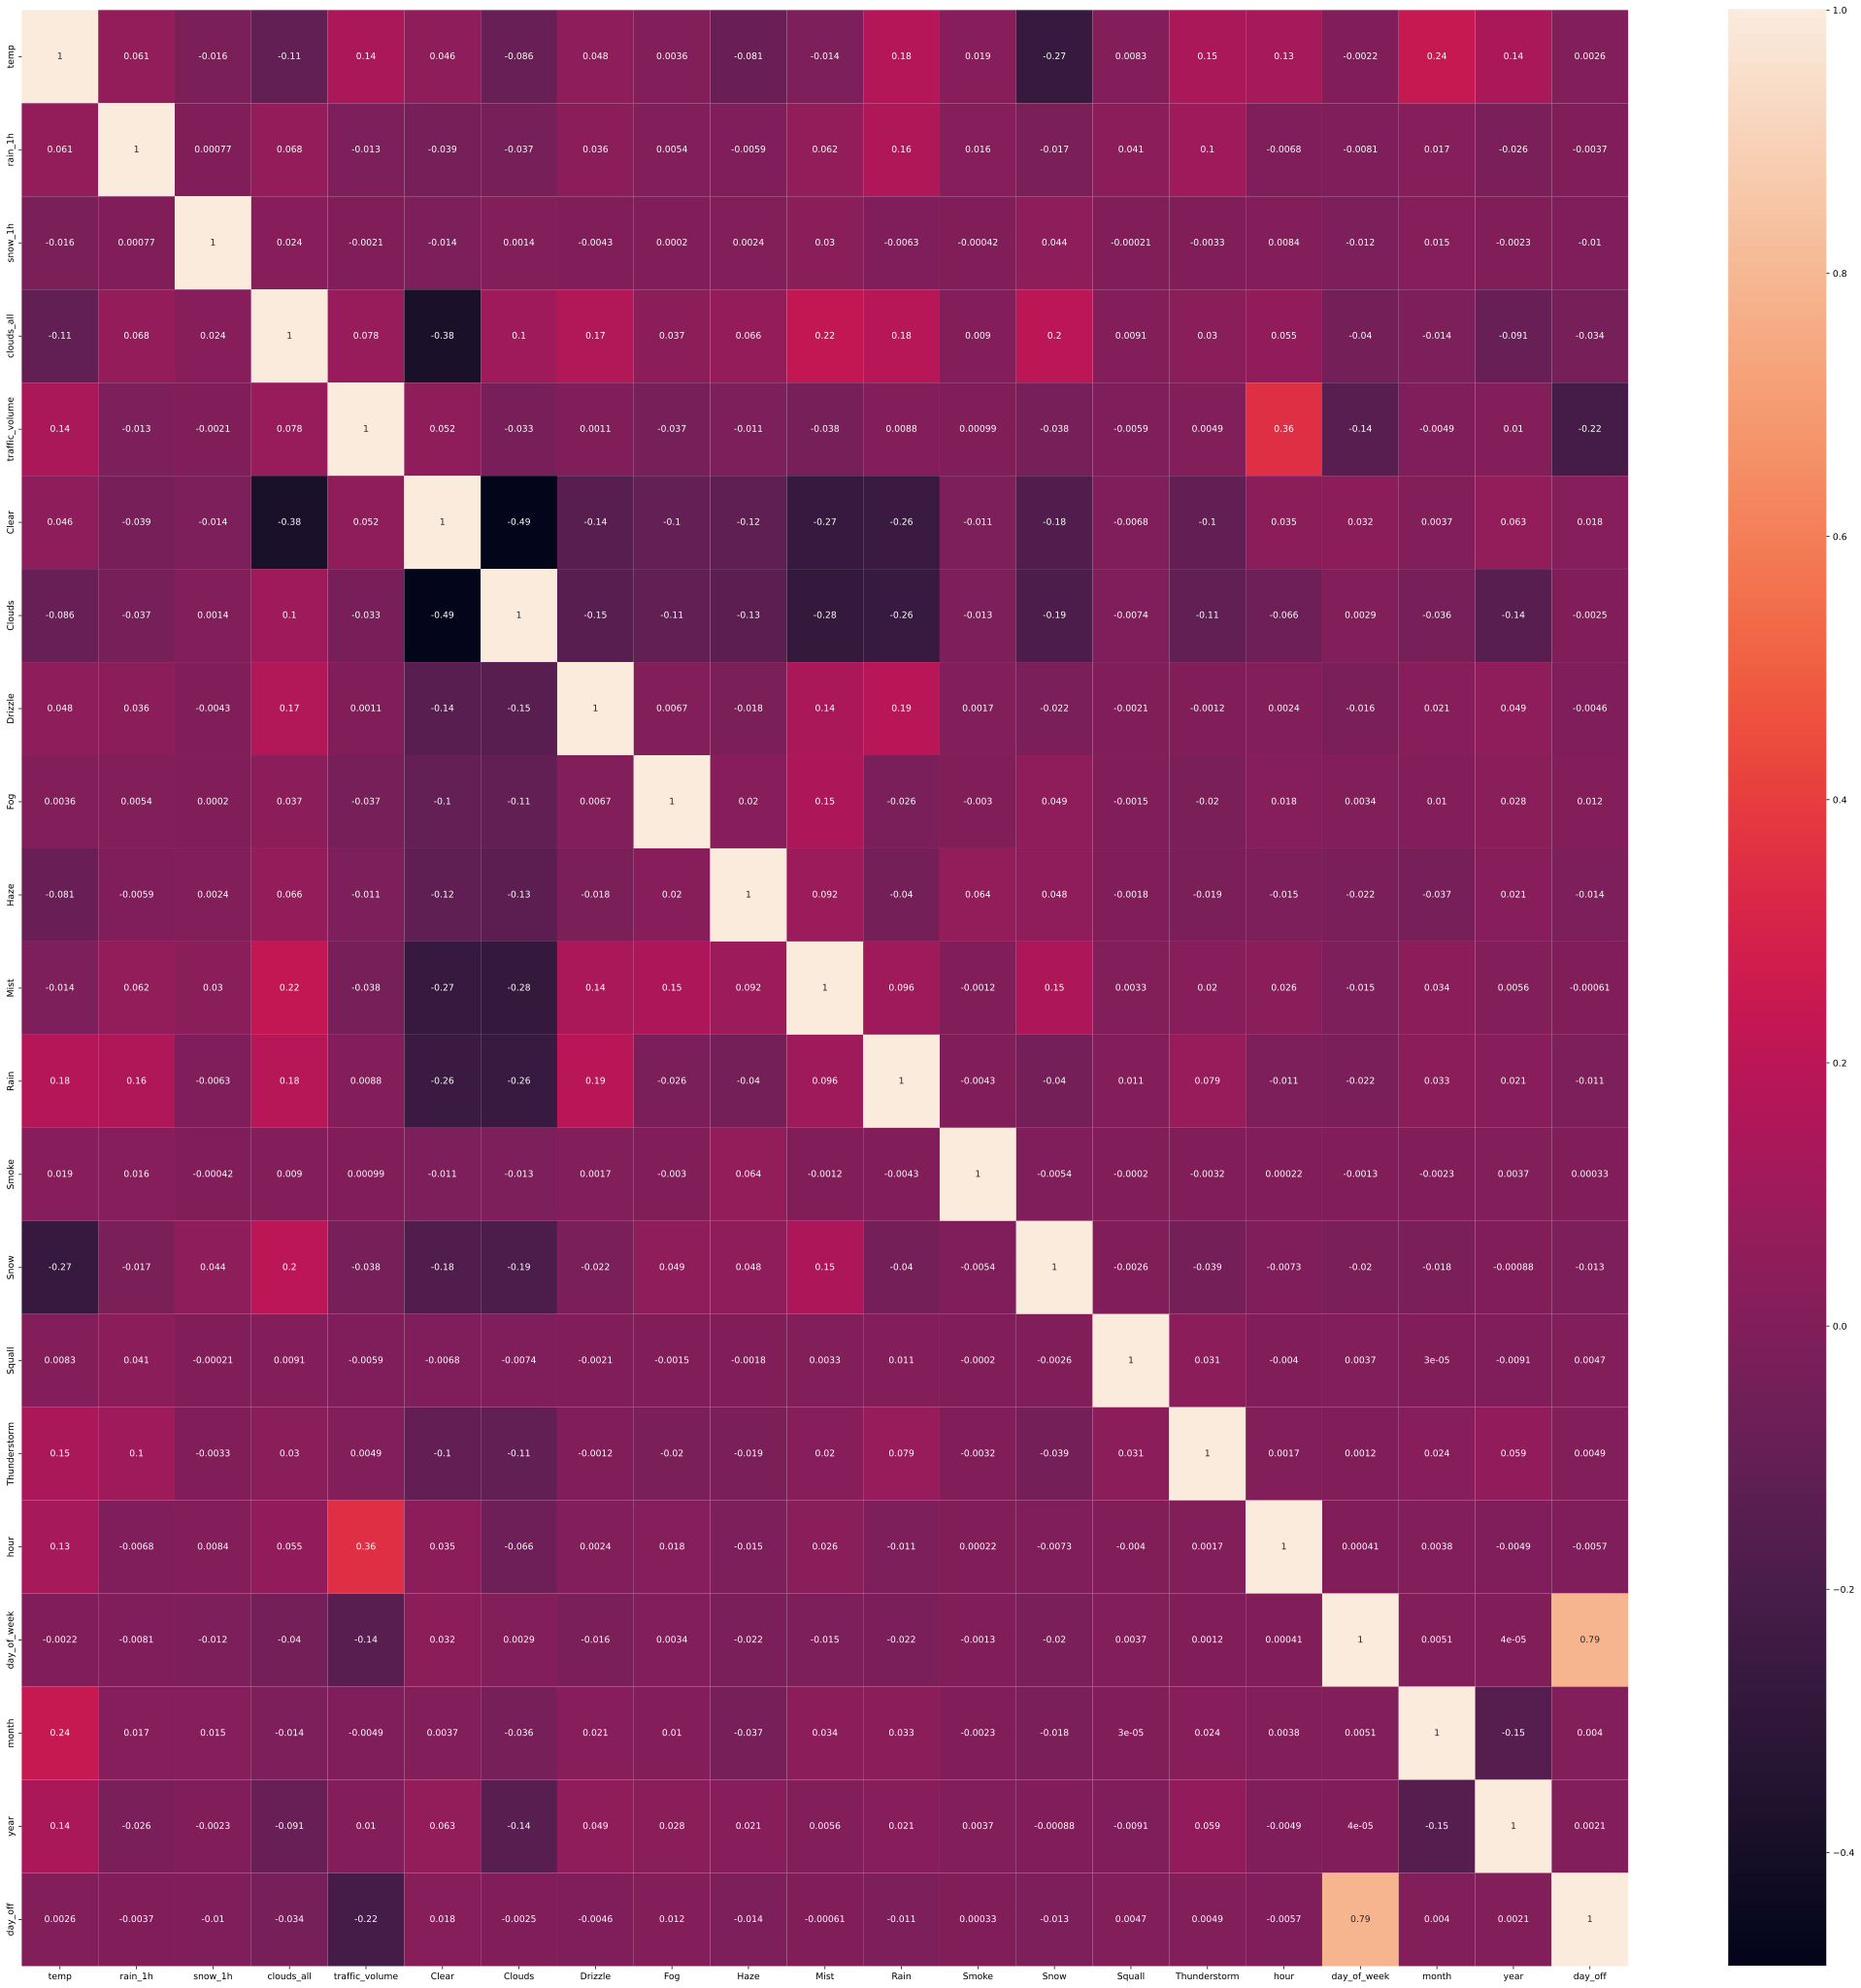

In [76]:
# To find the corrolation between the variables we should plot the croolation plot. 
# plot correlation heatmap
plt.rcParams['figure.figsize'] = [40, 40]
corr_matrix = df_new.corr()
sn.heatmap(corr_matrix, annot=True);

In [94]:
# what is the corrolation of the all features to the target= traffic_volunm. 
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume    1.000000
hour              0.355087
temp              0.139241
clouds_all        0.078210
Clear             0.052370
year              0.010384
Rain              0.008778
Thunderstorm      0.004931
Drizzle           0.001099
Smoke             0.000990
snow_1h          -0.002091
month            -0.004865
Squall           -0.005900
Haze             -0.010891
rain_1h          -0.013425
Clouds           -0.033277
Fog              -0.036782
Mist             -0.037965
Snow             -0.038194
day_of_week      -0.144165
day_off          -0.215541
Name: traffic_volume, dtype: float64

In [78]:
# we notice from the above corrolation metrix, hour , temp, cloud_all, day_off and day_of_week are the most corrolated to target value.
X = df_new[['day_off', 'temp', 'clouds_all', 'hour','day_of_week']]
y = df_new['traffic_volume']

#Split the data into train set and test set


In [79]:
# Create train and test sets for the chosen features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create train and test sets for all features!
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(df_new, y, test_size=0.2, random_state=42)

# standardizing train and test data



To build a Machine learning model we need to do pipeline to increase the iteration cycle and to scale models.

![Machine Learning Pipeline]()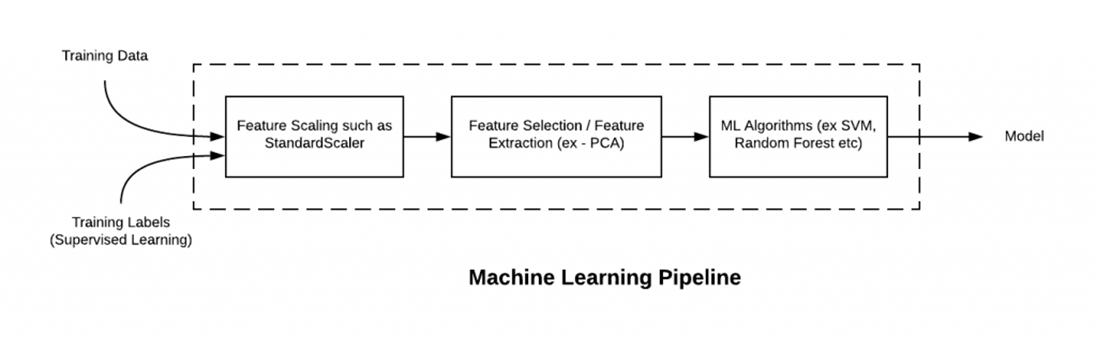

In [80]:
# Define piplines and use them on a x_train and x_test to standarize numerical variables and categorical variables
# we choose the categorical_variabal if the feature is orignally a categorical feature, e.g day_off that
# is extracted from hoilday (categorical feature) and day_of_week. 
numerical_variabl = ['hour', 'temp','day_of_week','clouds_all']
categorical_variabl = ['day_off']
# Assume the data is normally distributed.
# DataFrameSelector Transforms a DataFrame into a Series by selecting a single column by key.
#select the numerical feature
numerical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(numerical_variabl)),
    ('scaler', StandardScaler())])
# select the categorical feature 
categorical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(categorical_variabl))])

combined_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline_feature),
    ('cat_pipeline', categorical_pipeline_feature)])
# fit it via pipline
X_train_scalled = combined_pipeline.fit_transform(X_train)
X_test_scalled = combined_pipeline.transform(X_test)

In [81]:
# As we have done before for the selected feature, now we do it for all features. 
numerical_attributs = ['rain_1h', 'snow_1h', 'clouds_all', 'temp', 'hour', 'month','day_of_week', 'year']
categorical_attributs = ['Clouds', 'day_off', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 
                         'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
# Assume the data is normally distributed. 
#Let's select the numerical feature
numerical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(numerical_variabl)),
    ('scaler', StandardScaler())])
#Let's select the categorical feature 
categorical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(categorical_variabl))])
# now let's combine both features to be fitted in
combined_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline_feature),
    ('cat_pipeline', categorical_pipeline_feature)])
X_all_train_scalled = combined_pipeline.fit_transform(X_train)
X_all_test_scalled = combined_pipeline.transform(X_test)

Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. 

fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). So for training set, you need to both calculate and do transformation.

# Testing Data via different Models

In [82]:
#since we are training on different models let's creat a function that takes model's name, and required paramters. 
def train_test_various_models(models, X_train, X_test, y_train, y_test):
    """ we will pass models as a dictionary to train 
    train and test given modele on given data"""
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        print(f"r2 score on test data using {model_name}: {r2_score(y_test, y_test_pred)}\n")
        print(f"mean absoulte error score on test data using {model_name}:", end=" "),
        print(f"{(mean_absolute_error(y_test, y_test_pred))}\n")

# Testing Models

In [83]:
# create dictionary of the models that we use to trian our data.
models = {
    'linear_regression': LinearRegression(),
    'decision_tree_regresor': DecisionTreeRegressor(max_depth=5 , random_state = 0),
    'random_forest_regressor': RandomForestRegressor(max_depth=5, n_estimators=10, random_state = 0)}


#Result

In [84]:
# Let's see the result if we train the model with choson features!
train_test_various_models(models, X_train_scalled ,X_test_scalled , y_train, y_test)

r2 score on test data using linear_regression: 0.1783921154905388

mean absoulte error score on test data using linear_regression: 1583.8601306067264

r2 score on test data using decision_tree_regresor: 0.9071000582476424

mean absoulte error score on test data using decision_tree_regresor: 389.46231560677927

r2 score on test data using random_forest_regressor: 0.9157599766893743

mean absoulte error score on test data using random_forest_regressor: 363.98455844368823



In [85]:
# Let's see the result if we train the model with all features!
train_test_various_models(models, X_all_train_scalled , X_all_test_scalled, y_all_train, y_all_test)

r2 score on test data using linear_regression: 0.1783921154905388

mean absoulte error score on test data using linear_regression: 1583.8601306067264

r2 score on test data using decision_tree_regresor: 0.9071000582476424

mean absoulte error score on test data using decision_tree_regresor: 389.46231560677927

r2 score on test data using random_forest_regressor: 0.9157599766893743

mean absoulte error score on test data using random_forest_regressor: 363.98455844368823



# Observation

Looking at the previous result, we can notice that using all features or just selecting some features gives the same r-square. This means the selected features are the most corrolated with the target and adding more features will not affect the result.

Moreover, we can notice Random forest regressor and decision tree regressor are better than Linear regression.

# Tuning parameters
Let's now try to play with the argument parameters for the 
Random forest regressor and decision tree regressor.
Also, we should do cross validation for both models to try increasing r2 score.

In [86]:
#Tune Max_depth and min_samples_leaf for the Decision Tree Regressor Model 
param_grid = [
    {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
]
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
grid.best_params_
# examine the best model
print("Best params: ", grid.best_params_)
best_est_DTR = grid.best_estimator_
print("Best estimator: ", best_est_DTR)
print("Best score: ", grid.best_score_)

Best params:  {'max_depth': 12, 'min_samples_leaf': 50}
Best estimator:  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Best score:  0.937986388575957


In [87]:
# Tune Max_depth and min_samples_leaf for the Random Forest Regressor Model 
param_grid = [
    {'max_depth': [5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300],
     'n_estimators': [10, 20 ,50, 75, 100]}
]
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
# examine the best model

print("Best params: ", grid.best_params_)
best_est_RFR = grid.best_estimator_
print("Best estimator: ", best_est_RFR )
print("Best score: ", grid.best_score_)

Best params:  {'max_depth': 12, 'min_samples_leaf': 10, 'n_estimators': 100}
Best estimator:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best score:  0.9399142528911618


# Testing with Tunned Models

In [88]:
# Adjest the argument for the Random Forest Regressor and Decision Tree Regresor
models = {
    'best_randomforestregressor': best_est_RFR,
    'best_decisiontreeregresor': best_est_DTR,
}

 

# Result

In [89]:
# Let's see the result after Tunning the parameters with all selected features!
train_test_various_models(models, X_train_scalled , X_test_scalled, y_all_train, y_all_test)

r2 score on test data using best_randomforestregressor: 0.9383286088950054

mean absoulte error score on test data using best_randomforestregressor: 278.5526736015417

r2 score on test data using best_decisiontreeregresor: 0.9366548908668002

mean absoulte error score on test data using best_decisiontreeregresor: 284.383447229731



# Final prediction for the best models
 

In [90]:
Best_model=models['best_randomforestregressor']
y_test_pred = Best_model.predict(X_test_scalled)
# Conver the array into dataframe then save it in a new dataframe
df_test_pred = y_test.to_frame()
# Rename the target value
df_test_pred.rename(columns={"traffic_volume": "actual Value"}, inplace=True)
# Add the predicted value
df_test_pred['Predicted value'] = y_test_pred
df_test_pred.head()

,actual Value,Predicted value
40194,4343.0,4433.423348
30550,4362.0,4461.551057
36923,324.0,412.726428
33137,4749.0,5586.600131
22549,2751.0,3098.359489


# visualization for the best models
 

From the previous table, we want to plot each sample of real value and predicated value and the difference between them. 


In [91]:
# Let's take 15 sample.
number_samples= 15; 
# Take a sample point from the dataframe 
sample = df_test_pred.sample(n= number_samples , random_state=42)
# Find the absoulate value of the difference between Real Value and Predicted value.
sample['difference'] = np.abs(df_test_pred['Predicted value'] - df_test_pred['actual Value'])
# the following is the list of from 1 to number of samples.
number_samples_list=[]
for i in range(number_samples):
  number_samples_list.append(i+1)
  

Before plotting the figure let's understand zip function which we will mainly use to creat tubles of each sample in sample['Predicted value'] , sample.difference and number_samples_list. The following code illustrate that

In [92]:
print(list(zip(number_samples_list, sample['Predicted value'], sample.difference)))

[(1, 4297.736240533024, 377.2637594669759), (2, 4100.650009421979, 117.65000942197912), (3, 5464.431025207228, 980.5689747927718), (4, 1570.2527109550483, 335.7472890449517), (5, 3265.4522428572523, 93.54775714274774), (6, 5031.232850649056, 1242.7671493509442), (7, 3491.1861700959216, 363.1861700959216), (8, 5734.307899690885, 772.6921003091147), (9, 697.3320041560655, 69.33200415606552), (10, 3584.4693810956205, 157.53061890437948), (11, 4462.690955395628, 272.3090446043716), (12, 2112.9490860629185, 215.05091393708153), (13, 4875.835874443399, 157.835874443399), (14, 5975.624568340421, 670.3754316595787), (15, 5101.894331848197, 75.105668151803)]


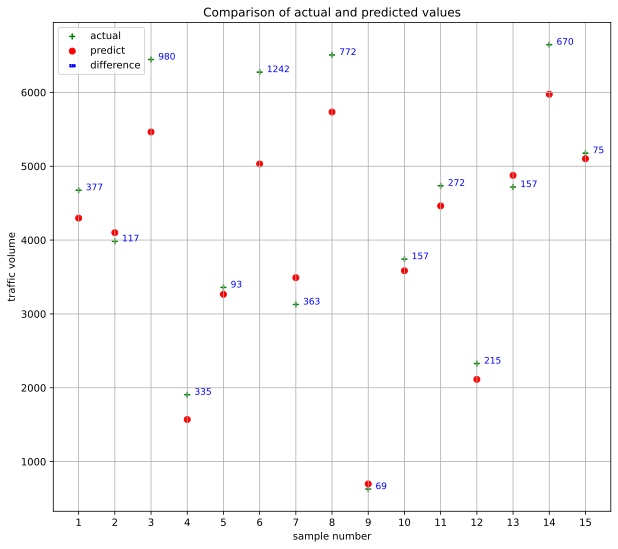

In [93]:
# Plot the predicted and actual samples 
plt.figure(figsize=[10,9])
plt.scatter(number_samples_list, sample['actual Value'], color='green', marker='+',label='actual')
plt.scatter(number_samples_list, sample['Predicted value'], color='red', marker='o', label='predict')
# Now we use zip function to itrate over it and plt the point of the difference.
for nu_sample, pre_value, diff_value in zip(number_samples_list, sample['actual Value'], sample.difference):
        # plto the numerical value of the  difference between the predicted value and actual value 
        # we dreft the x-axis by 0.1 for a visual porpous. 
        plt.text(nu_sample+0.2,pre_value, int(diff_value), color="blue", fontsize=9)
plt.scatter([], [], color='blue', marker='$123$', label='difference')
plt.legend()
plt.xticks(number_samples_list)
plt.grid()
plt.xlabel('sample number')
plt.ylabel('traffic volume')
plt.title("Comparison of actual and predicted values")
plt.savefig('Actual vs Predicted .png')